In [5]:
import torch
import datasets, networks, sampling, completion, evaluation
import matplotlib.pyplot as plt
from torch import nn

In [6]:
#HYPERPARAMETERS
num_epochs = 10

# TODO Select a optimizer. [ 'adam', 'adamw', 'rmsprop' ]
optimizer_option = 'adamw'

# TODO Select a batch size.
batch_size = 64

# TODO Select a learning rate.
lr = 0.005


num_residual = 15
num_kernels = 128

In [7]:
ds = datasets.Dataset('mnist', batch_size=batch_size)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

#ds.visualize_dataset(training_data)

Using device: cuda:0
Epoch:   1/ 30, Batch     1, Loss: 5.7492
Epoch:   1/ 30, Batch   101, Loss: 1.3290
Epoch:   1/ 30, Batch   201, Loss: 1.0892
Epoch:   1/ 30, Batch   301, Loss: 1.0310
Epoch:   1/ 30, Batch   401, Loss: 1.0098
Epoch:   1/ 30, Batch   501, Loss: 0.9916
Epoch:   1/ 30, Batch   601, Loss: 0.9701
Epoch:   1/ 30, Batch   701, Loss: 0.9352
Epoch:   1/ 30, Batch   801, Loss: 0.9090
Epoch:   1/ 30, Batch   901, Loss: 0.8956
-----------------------------------------
Epoch:   1 took 125.50s
Epoch:   1, Test Loss: 0.8829
-----------------------------------------


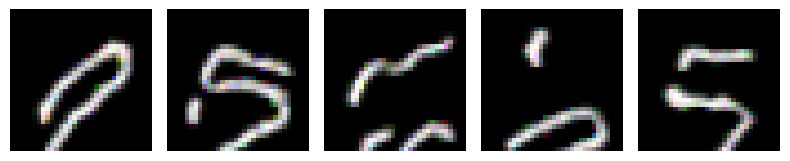

Epoch:   2/ 30, Batch     1, Loss: 0.8382
Epoch:   2/ 30, Batch   101, Loss: 0.8751
Epoch:   2/ 30, Batch   201, Loss: 0.8632
Epoch:   2/ 30, Batch   301, Loss: 0.8572
Epoch:   2/ 30, Batch   401, Loss: 0.8319
Epoch:   2/ 30, Batch   501, Loss: 0.8310
Epoch:   2/ 30, Batch   601, Loss: 0.8315
Epoch:   2/ 30, Batch   701, Loss: 0.8184
Epoch:   2/ 30, Batch   801, Loss: 0.8012
Epoch:   2/ 30, Batch   901, Loss: 0.8037
-----------------------------------------
Epoch:   2 took 120.68s
Epoch:   2, Test Loss: 0.8125
-----------------------------------------


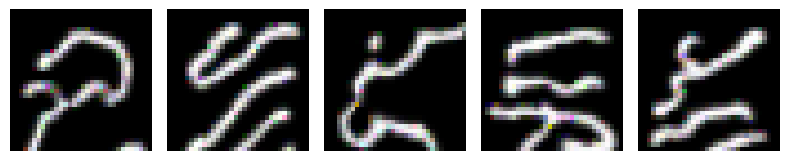

Epoch:   3/ 30, Batch     1, Loss: 0.8022
Epoch:   3/ 30, Batch   101, Loss: 0.7993
Epoch:   3/ 30, Batch   201, Loss: 0.7877
Epoch:   3/ 30, Batch   301, Loss: 0.7846
Epoch:   3/ 30, Batch   401, Loss: 0.7882
Epoch:   3/ 30, Batch   501, Loss: 0.7746
Epoch:   3/ 30, Batch   601, Loss: 0.7695
Epoch:   3/ 30, Batch   701, Loss: 0.7776
Epoch:   3/ 30, Batch   801, Loss: 0.7630
Epoch:   3/ 30, Batch   901, Loss: 0.7656
-----------------------------------------
Epoch:   3 took 122.08s
Epoch:   3, Test Loss: 0.7584
-----------------------------------------


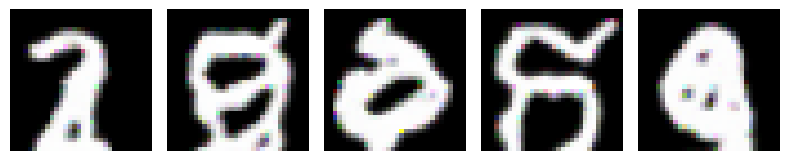

Epoch:   4/ 30, Batch     1, Loss: 0.7812
Epoch:   4/ 30, Batch   101, Loss: 0.7522
Epoch:   4/ 30, Batch   201, Loss: 0.7650
Epoch:   4/ 30, Batch   301, Loss: 0.7491
Epoch:   4/ 30, Batch   401, Loss: 0.7533
Epoch:   4/ 30, Batch   501, Loss: 0.7496
Epoch:   4/ 30, Batch   601, Loss: 0.7474
Epoch:   4/ 30, Batch   701, Loss: 0.7366
Epoch:   4/ 30, Batch   801, Loss: 0.7445
Epoch:   4/ 30, Batch   901, Loss: 0.7384
-----------------------------------------
Epoch:   4 took 122.02s
Epoch:   4, Test Loss: 0.8040
-----------------------------------------


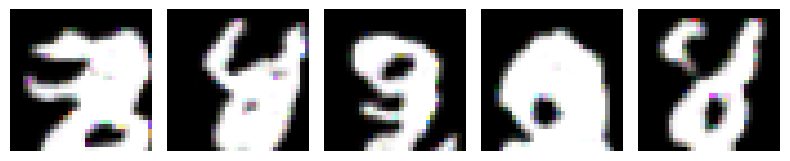

Epoch:   5/ 30, Batch     1, Loss: 0.7223
Epoch:   5/ 30, Batch   101, Loss: 0.7401
Epoch:   5/ 30, Batch   201, Loss: 0.7342
Epoch:   5/ 30, Batch   301, Loss: 0.7340
Epoch:   5/ 30, Batch   401, Loss: 0.7290
Epoch:   5/ 30, Batch   501, Loss: 0.7321
Epoch:   5/ 30, Batch   601, Loss: 0.7217
Epoch:   5/ 30, Batch   701, Loss: 0.7242
Epoch:   5/ 30, Batch   801, Loss: 0.7215
Epoch:   5/ 30, Batch   901, Loss: 0.7184
-----------------------------------------
Epoch:   5 took 121.99s
Epoch:   5, Test Loss: 0.7229
-----------------------------------------


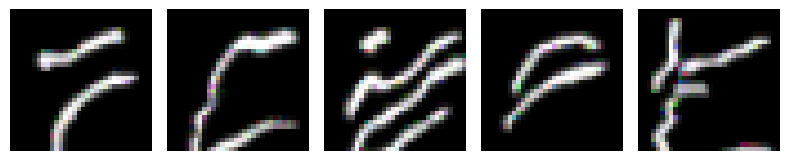

Epoch:   6/ 30, Batch     1, Loss: 0.7073
Epoch:   6/ 30, Batch   101, Loss: 0.7196
Epoch:   6/ 30, Batch   201, Loss: 0.7269
Epoch:   6/ 30, Batch   301, Loss: 0.7166
Epoch:   6/ 30, Batch   401, Loss: 0.7162
Epoch:   6/ 30, Batch   501, Loss: 0.7124
Epoch:   6/ 30, Batch   601, Loss: 0.7137
Epoch:   6/ 30, Batch   701, Loss: 0.7178
Epoch:   6/ 30, Batch   801, Loss: 0.7126
Epoch:   6/ 30, Batch   901, Loss: 0.7124
-----------------------------------------
Epoch:   6 took 121.99s
Epoch:   6, Test Loss: 0.7109
-----------------------------------------


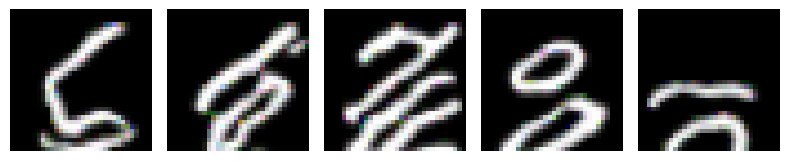

Epoch:   7/ 30, Batch     1, Loss: 0.6835
Epoch:   7/ 30, Batch   101, Loss: 0.7083
Epoch:   7/ 30, Batch   201, Loss: 0.7053
Epoch:   7/ 30, Batch   301, Loss: 0.7093
Epoch:   7/ 30, Batch   401, Loss: 0.6984
Epoch:   7/ 30, Batch   501, Loss: 0.7004
Epoch:   7/ 30, Batch   601, Loss: 0.7041
Epoch:   7/ 30, Batch   701, Loss: 0.7040
Epoch:   7/ 30, Batch   801, Loss: 0.7040
Epoch:   7/ 30, Batch   901, Loss: 0.7082
-----------------------------------------
Epoch:   7 took 121.97s
Epoch:   7, Test Loss: 0.6881
-----------------------------------------


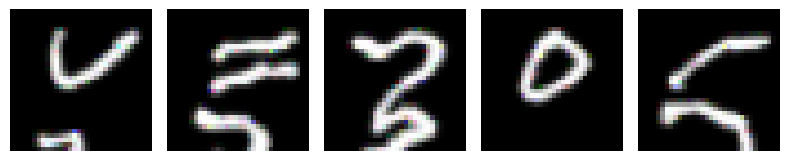

Epoch:   8/ 30, Batch     1, Loss: 0.7008
Epoch:   8/ 30, Batch   101, Loss: 0.6968
Epoch:   8/ 30, Batch   201, Loss: 0.6955
Epoch:   8/ 30, Batch   301, Loss: 0.6902
Epoch:   8/ 30, Batch   401, Loss: 0.6972
Epoch:   8/ 30, Batch   501, Loss: 0.6958
Epoch:   8/ 30, Batch   601, Loss: 0.7028
Epoch:   8/ 30, Batch   701, Loss: 0.6958
Epoch:   8/ 30, Batch   801, Loss: 0.6977
Epoch:   8/ 30, Batch   901, Loss: 0.6964
-----------------------------------------
Epoch:   8 took 122.11s
Epoch:   8, Test Loss: 0.6908
-----------------------------------------


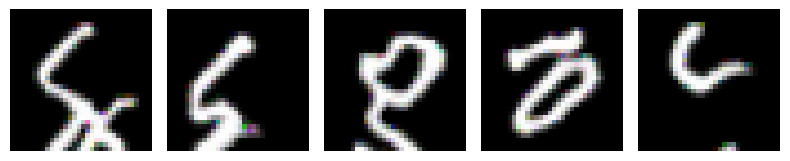

Epoch:   9/ 30, Batch     1, Loss: 0.7192
Epoch:   9/ 30, Batch   101, Loss: 0.6854
Epoch:   9/ 30, Batch   201, Loss: 0.6835
Epoch:   9/ 30, Batch   301, Loss: 0.6955
Epoch:   9/ 30, Batch   401, Loss: 0.6896
Epoch:   9/ 30, Batch   501, Loss: 0.6953
Epoch:   9/ 30, Batch   601, Loss: 0.6891
Epoch:   9/ 30, Batch   701, Loss: 0.6883
Epoch:   9/ 30, Batch   801, Loss: 0.6870
Epoch:   9/ 30, Batch   901, Loss: 0.6879
-----------------------------------------
Epoch:   9 took 121.96s
Epoch:   9, Test Loss: 0.6885
-----------------------------------------


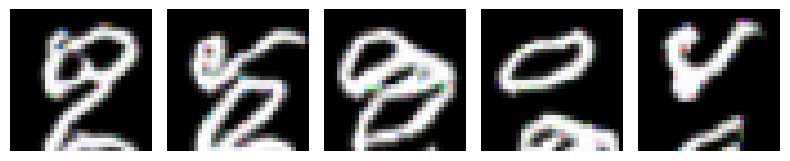

Epoch:  10/ 30, Batch     1, Loss: 0.6826
Epoch:  10/ 30, Batch   101, Loss: 0.6862
Epoch:  10/ 30, Batch   201, Loss: 0.6833
Epoch:  10/ 30, Batch   301, Loss: 0.6828
Epoch:  10/ 30, Batch   401, Loss: 0.6842
Epoch:  10/ 30, Batch   501, Loss: 0.6814
Epoch:  10/ 30, Batch   601, Loss: 0.6790
Epoch:  10/ 30, Batch   701, Loss: 0.6852
Epoch:  10/ 30, Batch   801, Loss: 0.6811
Epoch:  10/ 30, Batch   901, Loss: 0.6745
-----------------------------------------
Epoch:  10 took 122.00s
Epoch:  10, Test Loss: 0.6774
-----------------------------------------


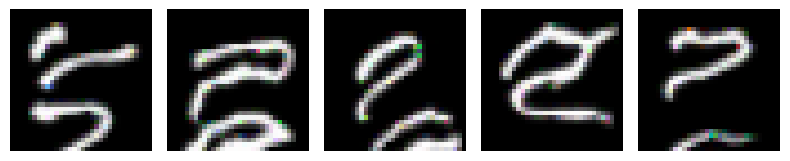

Epoch:  11/ 30, Batch     1, Loss: 0.6710
Epoch:  11/ 30, Batch   101, Loss: 0.6793
Epoch:  11/ 30, Batch   201, Loss: 0.6880
Epoch:  11/ 30, Batch   301, Loss: 0.6830
Epoch:  11/ 30, Batch   401, Loss: 0.6795
Epoch:  11/ 30, Batch   501, Loss: 0.6771
Epoch:  11/ 30, Batch   601, Loss: 0.6820
Epoch:  11/ 30, Batch   701, Loss: 0.6770
Epoch:  11/ 30, Batch   801, Loss: 0.6763
Epoch:  11/ 30, Batch   901, Loss: 0.6766
-----------------------------------------
Epoch:  11 took 121.99s
Epoch:  11, Test Loss: 0.7661
-----------------------------------------


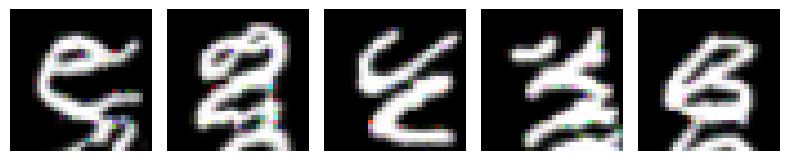

Epoch:  12/ 30, Batch     1, Loss: 0.6893


KeyboardInterrupt: 

In [8]:
# Training
import time
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
from torch.optim import Adam, AdamW, RMSprop, SGD 

PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)
# Select device
# if torch.cuda.is_available():
#   device = torch.device('cuda:0')
# else:
#   device = torch.device('cpu')
device = torch.device('cuda:0')
print(f'Using device: {device}')
print('=========================================')

PixelCNN.to(device)

learning_rates = []
train_loss_curve = []
test_loss_curve = []
train_loss_epochs = []
test_loss_epochs = []
optimizer = None

# Select optimizer
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
else:
  optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


overall_start_time = time.time()

# training loop
for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  PixelCNN.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device)
    output = PixelCNN(images)
    # print(output.shape)
    images = images.view(-1)
    # images = images.permute(0, 2, 3, 1).contiguous().view(-1)
    # print(images.shape)
    output = torch.reshape(output, (batch_size, 256, 3, 32, 32))
    output = output.permute(0,2,3,4,1).contiguous().view(-1, 256)

    # output = nn.functional.softmax(output, dim=1)
    # output = torch.argmax(output, dim=1)

    # print(output)
    images = images*255
    # print(images.long())

    loss = nn.functional.cross_entropy(output, images.long())
    loss.backward()
    torch.nn.utils.clip_grad_norm_(PixelCNN.parameters(), 1)
    # torch.nn.utils.clip_grad_norm_(PixelCNN.parameters(), 1)
    optimizer.step()
    for param_group in optimizer.param_groups:
      learning_rates.append(param_group['lr'])
    optimizer.zero_grad()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      train_loss_curve.append(average_loss)
      train_loss_epochs.append(epoch + 1)
      losses = []
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  # scheduler.step()
  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  test_loss = evaluation.evaluate(model=PixelCNN, test_data_loader=test_data, device=device, batch_size=batch_size)
  test_loss_curve.append(test_loss)
  test_loss_epochs.append(epoch + 1)
  print(f'Epoch: {epoch + 1:3d}, Test Loss: {test_loss:.4f}')
  print('-----------------------------------------')
  

  samples = sampling.sample(PixelCNN, num_samples=5)
  sampling.save_samples(samples, filename="MNIST", mnist=True)
  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')

# Loss Curve Plot
plt.figure(figsize=(10, 5))
plt.plot(train_loss_epochs, train_loss_curve, label='Train Loss')
plt.scatter(test_loss_epochs, test_loss_curve, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Learning Rate Plot
num_batches = len(training_data)
learning_rates_res = [sum(learning_rates[i * num_batches:(i + 1) * num_batches]) / num_batches for i in range(num_epochs)]
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates_res)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Time')
plt.show()

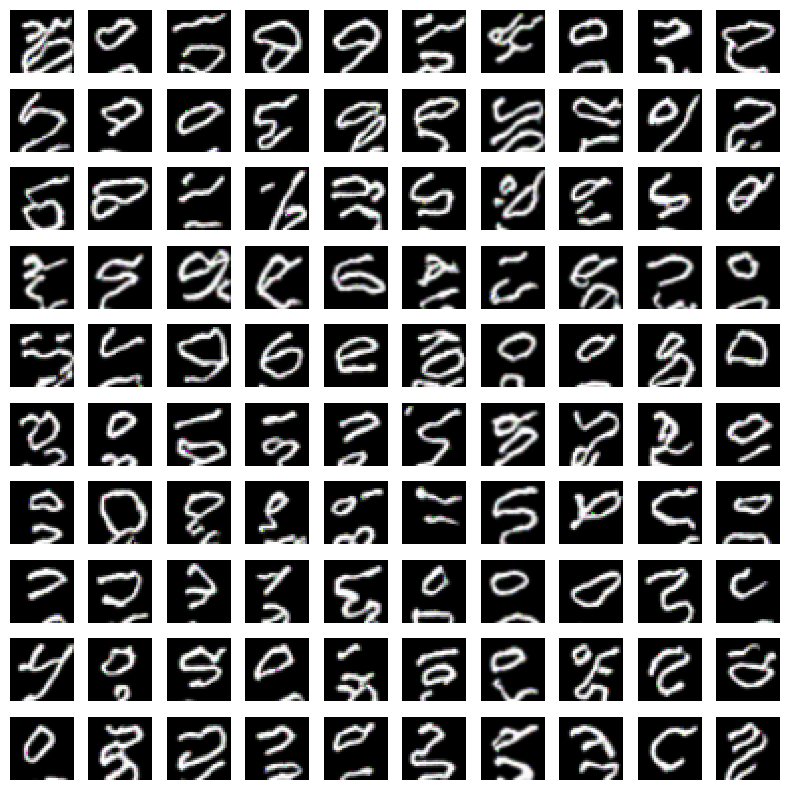

In [9]:
final_samples= sampling.sample(PixelCNN, num_samples=100)
sampling.save_samples(final_samples, filename = "MNIST", mnist = True)